In [1]:
import numpy as np
import pandas as  pd
import os
pd.set_option('display.max_colwidth', 150)
import spacy
nlp = spacy.load("en_core_web_sm")

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv(r"cleaned_reels_hashtags.csv")

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import FeatureUnion
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [4]:
import nlpaug.augmenter.word as naw
import random
from nltk.corpus import stopwords
import nltk
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
import gensim
from gensim.utils import simple_preprocess
import re

In [5]:
from tqdm import tqdm
from textblob import TextBlob
import swifter


In [6]:
df.head(5)

,hashtags,lemmatized_tags,number_of_tags,topic,encoded_topic
0,reels fyp barcelona realmadrid,reels fyp barcelona realmadrid,4,Sports,21
1,reelsindia reelsvideos instareels instagramreels friendshipquote explorepage explore,reelsindia reelsvideo instareel instagramreels friendshipquote explorepage explore,7,Relationships,18
2,reels comedy kannadareels yashwanthshetty kannadacomedy bengaluru,reel comedy kannadareel yashwanthshetty kannadacomedy bengaluru,6,Comedy,4
3,pokemon pokemongo nostalgia retrogaming,pokemon pokemongo nostalgia retrogame,4,Gaming,12
4,vibes trending milkshake,vibe trend milkshake,3,Food,11


In [7]:
print(df.shape)
print(df.info())

(1585, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1585 entries, 0 to 1584
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   hashtags         1585 non-null   object
 1   lemmatized_tags  1585 non-null   object
 2   number_of_tags   1585 non-null   int64 
 3   topic            1585 non-null   object
 4   encoded_topic    1585 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 62.0+ KB
None


In [8]:
num_null = df['topic'].isnull().sum()
num_not_null = df['topic'].notnull().sum()

In [9]:
count_df = pd.DataFrame({
    'Status': ['Null', 'Not Null'],
    'Count': [num_null, num_not_null]
})

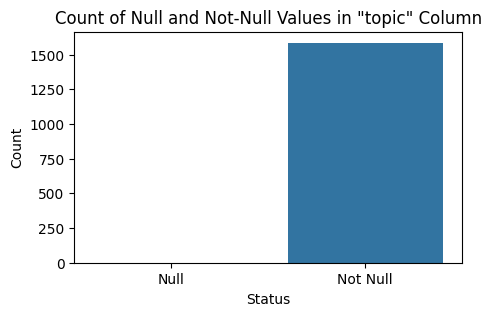

In [10]:
plt.figure(figsize=(5, 3))
sns.barplot(x='Status', y='Count', data=count_df)
plt.title('Count of Null and Not-Null Values in "topic" Column')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

In [11]:
topic_count = df['topic'].value_counts()

C:\Users\HP\AppData\Local\Temp\ipykernel_10248\3787648114.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  graph.set_xticklabels(graph.get_xticklabels(), rotation=90)


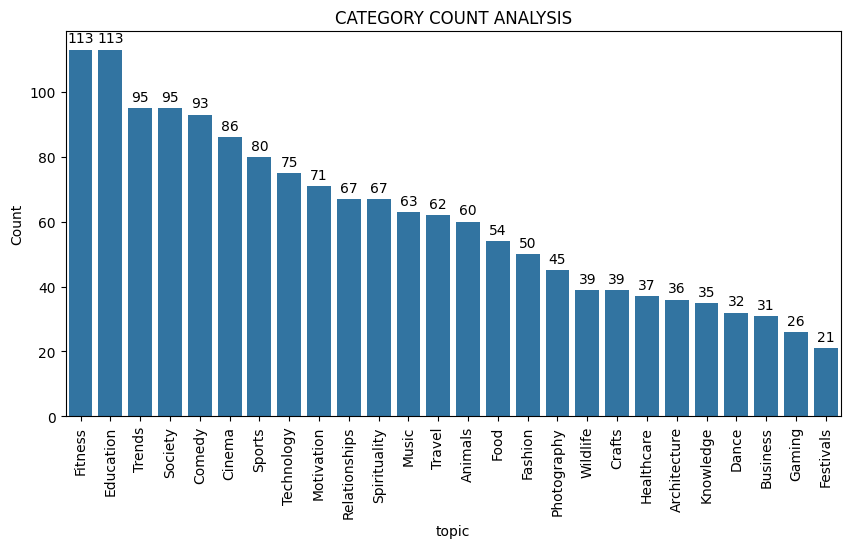

In [12]:
fig = plt.figure(figsize=(10, 5))
graph = fig.add_subplot(111)

sns.barplot(x=topic_count.index, y=topic_count, ax=graph)
graph.set_xticklabels(graph.get_xticklabels(), rotation=90)

for x, bar in enumerate(graph.patches):
    height = bar.get_height()

    graph.annotate(
        f'{int(height)}',
        xy=(bar.get_x() + bar.get_width() / 2, height),
        xytext=(0, 3),
        size=10,
        color='black',
        ha='center',
        va='bottom',
        textcoords='offset points'
    )

plt.title("CATEGORY COUNT ANALYSIS")
plt.ylabel("Count")
plt.show()

In [13]:
topic_list = df['topic'].unique()
print(topic_list, len(topic_list))

['Sports' 'Relationships' 'Comedy' 'Gaming' 'Food' 'Crafts' 'Technology'
 'Fitness' 'Wildlife' 'Travel' 'Architecture' 'Motivation' 'Knowledge'
 'Spirituality' 'Education' 'Dance' 'Animals' 'Society' 'Trends' 'Cinema'
 'Festivals' 'Music' 'Business' 'Fashion' 'Healthcare' 'Photography'] 26


In [14]:
df.head(5)

,hashtags,lemmatized_tags,number_of_tags,topic,encoded_topic
0,reels fyp barcelona realmadrid,reels fyp barcelona realmadrid,4,Sports,21
1,reelsindia reelsvideos instareels instagramreels friendshipquote explorepage explore,reelsindia reelsvideo instareel instagramreels friendshipquote explorepage explore,7,Relationships,18
2,reels comedy kannadareels yashwanthshetty kannadacomedy bengaluru,reel comedy kannadareel yashwanthshetty kannadacomedy bengaluru,6,Comedy,4
3,pokemon pokemongo nostalgia retrogaming,pokemon pokemongo nostalgia retrogame,4,Gaming,12
4,vibes trending milkshake,vibe trend milkshake,3,Food,11


In [15]:
df = df.dropna(subset=['topic'])
print(df.shape)

(1585, 5)


In [16]:
stopwords_list = set(stopwords.words('english'))
wn = WordNetLemmatizer()

In [17]:
import string
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [18]:
df['hashtags'] = df['hashtags'].str.replace('#', '', regex=False)
df['hashtags'] = df['hashtags'].str.strip()

In [19]:
def remove_punct(tags):

    rp_tags = "".join([i for i in tags if i not in string.punctuation])
    return rp_tags

df = df.dropna(subset=['hashtags'])
df.loc[:, 'hashtags'] = df['hashtags'].apply(lambda x: remove_punct(x))

In [20]:
def remove_stopwords(tags):

    tag_list = []
    for tag in gensim.utils.simple_preprocess(tags):
        if tag not in stopwords_list:
            tag_list.append(tag)
    final_tags = " ".join(tag_list)
    return final_tags

df.loc[:, 'hashtags'] = df['hashtags'].apply(lambda x: remove_stopwords(x))

In [21]:
df['encoded_topic'] = df['topic'].astype('category').cat.codes

In [22]:
def lemmatize_text(tag):

    doc = nlp(tag)
    return " ".join([token.lemma_ for token in doc])

df['lemmatized_tags'] = df['hashtags'].swifter.apply(lemmatize_text)
df['number_of_tags'] = df['hashtags'].swifter.apply(lambda x: len(x.split()))

Pandas Apply:   0%|          | 0/1585 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1585 [00:00<?, ?it/s]

In [23]:
order = ['hashtags', 'lemmatized_tags', 'number_of_tags', 'topic', 'encoded_topic']
df = df[order]

In [24]:
df.to_csv(r"cleaned_reels_hashtags.csv", index=False)
df.head(10)

,hashtags,lemmatized_tags,number_of_tags,topic,encoded_topic
0,reels fyp barcelona realmadrid,reels fyp barcelona realmadrid,4,Sports,21
1,reelsindia reelsvideos instareels instagramreels friendshipquote explorepage explore,reelsindia reelsvideo instareel instagramreels friendshipquote explorepage explore,7,Relationships,18
2,reels comedy kannadareels yashwanthshetty kannadacomedy bengaluru,reel comedy kannadareel yashwanthshetty kannadacomedy bengaluru,6,Comedy,4
3,pokemon pokemongo nostalgia retrogaming,pokemon pokemongo nostalgia retrogame,4,Gaming,12
4,vibes trending milkshake,vibe trend milkshake,3,Food,11
5,memes artcommunity designers cats graphicdesigner digitalart digitalartists,memes artcommunity designer cat graphicdesigner digitalart digitalartist,7,Crafts,5
6,isuzutruck nmr,isuzutruck nmr,2,Technology,22
7,martialarts reflex train cringe alpha sigma,martialarts reflex train cringe alpha sigma,6,Sports,21
8,shorts ﬁtness transformation motivation dietplan reelsinstagram explore shortshorts foryou explorepage trending like share,short ﬁtness transformation motivation dietplan reelsinstagram explore shortshort foryou explorepage trending like share,13,Fitness,10
9,comedy memes,comedy meme,2,Comedy,4


In [25]:
X = df[['lemmatized_tags', 'number_of_tags']]
y = df['topic']

In [26]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
v = dict(zip(list(y), df['topic'].to_list()))

In [28]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', ngram_range=(1, 2))),
    ('svd', TruncatedSVD(n_components=100)),
    ('clf', LogisticRegression(multi_class='multinomial', solver='lbfgs'))
])

In [29]:
pipeline.fit(X_train['lemmatized_tags'].to_list(), list(y_train))

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(ngram_range=(1, 2), stop_words='english')),
                ('svd', TruncatedSVD(n_components=100)),
                ('clf', LogisticRegression(multi_class='multinomial'))])

In [30]:
y_pred = pipeline.predict(X_test['lemmatized_tags'].to_list())

In [31]:
accuracy = accuracy_score(y_test, y_pred)
print(f"ACCURACY :  {accuracy*100:.4f}")

ACCURACY :  23.3438


In [32]:

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=encoder.classes_))



Classification Report:

               precision    recall  f1-score   support

      Animals       1.00      0.50      0.67        12
 Architecture       0.00      0.00      0.00         7
     Business       0.00      0.00      0.00         6
       Cinema       0.67      0.24      0.35        17
       Comedy       0.63      0.63      0.63        19
       Crafts       0.00      0.00      0.00         8
        Dance       0.00      0.00      0.00         6
    Education       0.06      0.52      0.11        23
      Fashion       0.00      0.00      0.00        10
    Festivals       0.00      0.00      0.00         4
      Fitness       0.89      0.35      0.50        23
         Food       0.00      0.00      0.00        11
       Gaming       0.00      0.00      0.00         5
   Healthcare       0.00      0.00      0.00         7
    Knowledge       0.00      0.00      0.00         7
   Motivation       1.00      0.43      0.60        14
        Music       1.00      0.15     

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

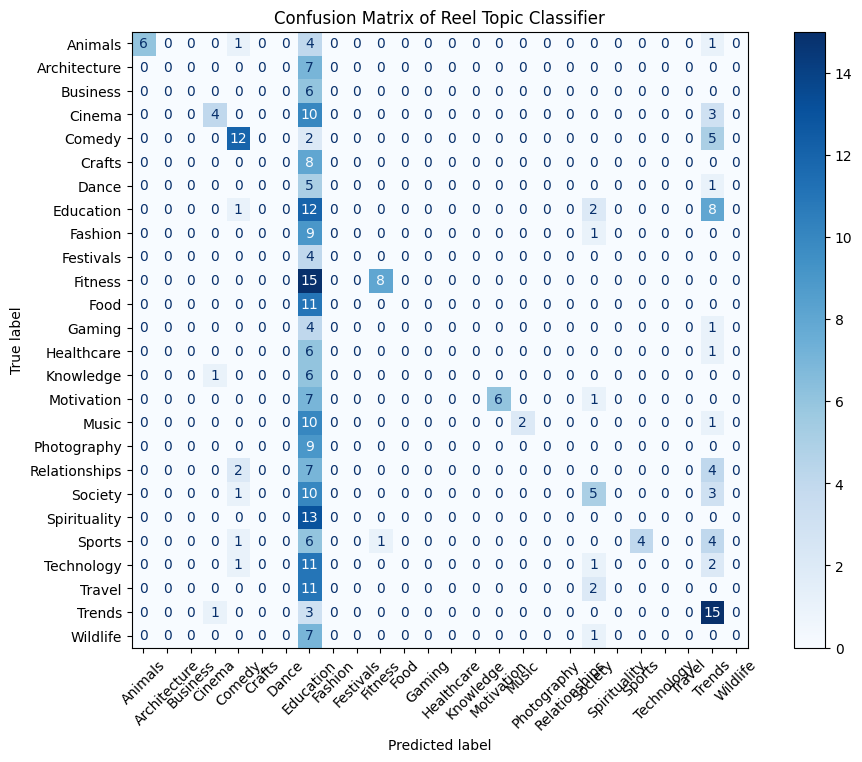

In [33]:

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting Confusion Matrix
import matplotlib.pyplot as plt

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=encoder.classes_)
fig, ax = plt.subplots(figsize=(12, 8))
disp.plot(ax=ax, cmap='Blues')
plt.title("Confusion Matrix of Reel Topic Classifier")
plt.xticks(rotation=45)
plt.show()


In [34]:
X_TEST = X_test['lemmatized_tags'].to_list()
Y_TEST = list(y_test)

In [35]:
predicted = pipeline.predict(X_TEST)

In [36]:
c = 0

for tag, en_topic in zip(X_TEST, predicted):
    if c == 2:
        break

    print("-" * 55)
    
    print(f"Tag: {tag}")
    print(f"Predicted Topic: {v[en_topic]}")
    
    print("-" * 55)

    c += 1

-------------------------------------------------------
Tag: sorryneighbors sorryhusband iamwhoiam texasholdem funnyreel husbandandwife husbandwife beyonce marriedlife
Predicted Topic: Education
-------------------------------------------------------
-------------------------------------------------------
Tag: canada canada canadalife réel reels reelitfeelit reelsinstagram reel reelindia reelit reelviral reelsindia reelsinsta reelvideo trend viralvideos viral viralreel viral viralsong trendingreel trendalert fyp fypシ fypage
Predicted Topic: Trends
-------------------------------------------------------


In [37]:
np.mean(predicted == Y_TEST)*100

23.34384858044164

In [38]:
hashtag = "#shahrukhkhan #anushkasharma #chyd #bhaukadam #nileshsable #sagarkarande #bharatganeshpure #shreyabugde #comedy #comedian #funnymemes #follow #fun #lol #humor #bollywood #marathi #marathicomedy #dailymemes #instagram #instadaily #instagood #love #laugh #meme #memepage #like"
hashtag = hashtag.replace("#", '')
print(hashtag)

shahrukhkhan anushkasharma chyd bhaukadam nileshsable sagarkarande bharatganeshpure shreyabugde comedy comedian funnymemes follow fun lol humor bollywood marathi marathicomedy dailymemes instagram instadaily instagood love laugh meme memepage like


In [39]:
predicted = pipeline.predict([hashtag])
print(v[predicted[0]])

Comedy


In [40]:
hastag_list = ["#men #funnyreels #comedyvideos #relatable",
               "#teachergoals #teacher #teachersbelike #schoolmemes #school #real #funny #humor #fyp #foryoupage #teacherslander #relatable #fy",
               "#ootdfashion #trending #charlottemyatt",
               "#drinks #drunk #bar #restaurant #alcohol #alcoholic #cocktails #indians #germanyðŸ‡©ðŸ‡ª #night",
               "#gym #gymmotivation #discipline #gymrat #fit #ï¬tness #mindset #college #workhard #sju #reels #nevergiveup #consistency #diet #builtdifferent #reels #fyp",
               "#standupcomedy #comedy #instagood #instagram #reelsinstagram #meditation",
               "#fitness #gym #benchpress #dumbells #fy #fyp #gymrat #gymaddict #bodybuilding #fit",
               "#standup #standupcomedy",
               "#MAiiB #MaiibEducation #OverseasEducation #StudyAbroad #StudentLife #meme #funny #pov #CareerHelp #CareerDevelopment #CareerCoach #ieltsindia #tofelindia #InfoSession #education #freedom #potential #skills #career #success #students #empowerment",
               "#mogwats #mogwarts #looksmaxxing #chico #jordenbarrett #jawline #maxilla #LookMax #TransformationTuesday #StyleAdventure #ConfidenceUnleashed #ownyourjourney",
               "#standup #jokes #standupcomedy",
               "#corporatememes #officememes #corporatelife #officememes #officelife #officejokes #corporatejokes #infosys #tcs #cts #cognizant #accenture #deloitte #genpact #capgemini",
               "#serialkiller #realstories #reallifestories #facts #fypã‚· #controversy",
               "#comedy #standupcomedy #comedian",
               "#python #dl #nn #aiwalkers #telugumemes #trending #telugu #chatgpt #machinelearning #artificialintelligence #deeplearning #technology #chatgpt",
               "#explore #comedy #funny #viral",
               "#life #connection",
               "#nimmaupendra #nimmasadhukokila #uppifans #officialhemanthkumar #JhankarMusic #kannnadamoviesongs #kannadareels #cousins #superlyrics #kannadalyrics #nammabengaluru #kannadafilm #kannadasongs #sandalwoodmovies #kannadareelsofficial #sandalwoodadda #kannadawhatsappstatus #kannadasongsareawesome #kannadacoveragesongs #sandalwoodadda #dananjayakeys #krishnarajshettyofficial",
               "#ImperfectlySteadfast #UnwaveringSupport #ThroughThickAndThin #FriendshipEndures #FlawsAndAll #AlwaysHereForYou",
               "#explore #explorepage #reels"
              ]

In [41]:
feed_label = []

for tag in hastag_list:
    hashtag = tag.replace("#", '')
    predicted = pipeline.predict([hashtag])
    feed_label.append(v[predicted[0]])

print(feed_label)

['Trends', 'Education', 'Society', 'Education', 'Fitness', 'Comedy', 'Fitness', 'Comedy', 'Education', 'Education', 'Comedy', 'Society', 'Education', 'Comedy', 'Education', 'Comedy', 'Education', 'Education', 'Education', 'Trends']


In [42]:
from collections import Counter

In [43]:
category_counts = Counter(feed_label)
labels = category_counts.keys()
counts = category_counts.values()

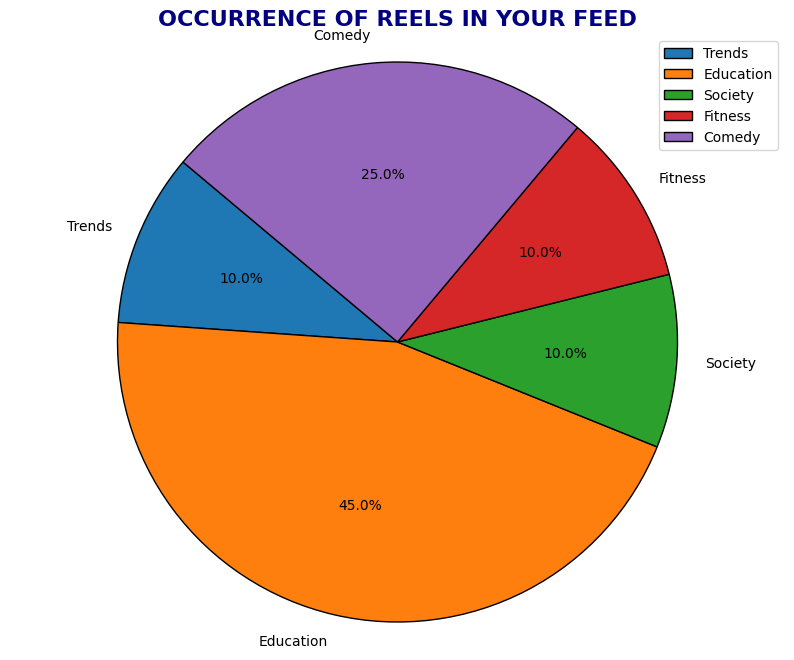

In [44]:
plt.figure(figsize=(10, 8))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140, shadow=False, wedgeprops={'edgecolor': 'black'})
plt.title('OCCURRENCE OF REELS IN YOUR FEED', fontsize=16, fontweight='bold', color='navy')
plt.axis('equal')

plt.legend(loc='upper right')

plt.show()